In [1]:
#import the libraries
import pandas as pd #for data processing
import numpy as np
import seaborn as sns #data visualization
import matplotlib.pyplot as plt


In [2]:
#from the data we can be able to understand the necessary measure to take on dealing with meningitis
#load the data set
mng_dataframe = pd.read_csv("/home/queen/Desktop/python/fproject/HdsnProject/meningitis_dataset.csv")
mng_dataframe.head()#prints the first five rows of the datase by default.

,id,surname,firstname,middlename,gender,gender_male,gender_female,state,settlement,rural_settlement,...,NmA,NmC,NmW,health_status,alive,dead,report_outcome,unconfirmed,confirmed,null_serotype
0,1,Solade,Grace,Solape,Female,0,1,Rivers,Rural,1,...,0,0,0,alive,1,0,confirmed,0,1,1
1,2,Eneche,Kure,Balogun,Male,1,0,Ebonyi,Rural,1,...,0,0,1,Alive,1,0,Confirmed,1,0,1
2,3,Sanusi,Adaugo,Katerine,Female,0,1,Ogun,Urban,0,...,0,0,1,Dead,0,1,Not Confirmed,1,0,1
3,4,Sowore,Mooslemat,Ifedayo,Female,0,1,Ondo,Rural,1,...,0,0,1,Alive,1,0,Not Confirmed,1,0,1
4,5,Abdusalam,Yusuf,Okafor,Male,1,0,Oyo,Urban,0,...,0,0,1,Alive,1,0,Confirmed,1,0,1


In [3]:
#print out more information about the dataset
mng_dataframe.info()#give the extra details of the dataset, no of rows, columns etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284484 entries, 0 to 284483
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   id                          284484 non-null  int64 
 1   surname                     284484 non-null  object
 2   firstname                   284484 non-null  object
 3   middlename                  284484 non-null  object
 4   gender                      284484 non-null  object
 5   gender_male                 284484 non-null  int64 
 6   gender_female               284484 non-null  int64 
 7   state                       284484 non-null  object
 8   settlement                  284484 non-null  object
 9   rural_settlement            284484 non-null  int64 
 10  urban_settlement            284484 non-null  int64 
 11  report_date                 284484 non-null  object
 12  report_year                 284484 non-null  int64 
 13  age                         2

In [4]:
#describe gives the statistical summary
mng_dataframe.describe()

,id,gender_male,gender_female,rural_settlement,urban_settlement,report_year,age,child_group,adult_group,cholera,...,rubella_mars,malaria,NmA,NmC,NmW,alive,dead,unconfirmed,confirmed,null_serotype
count,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,...,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000
mean,144727.037932,0.482319,0.517681,0.501128,0.498872,2013.503097,34.732396,0.291707,0.708293,0.100494,...,0.100318,0.100304,0.024740,0.025063,0.950194,0.499835,0.500165,0.749691,0.250309,0.900304
std,83406.850454,0.499688,0.499688,0.500000,0.500000,2.871560,22.240912,0.454549,0.454549,0.300658,...,0.300425,0.300406,0.155331,0.156317,0.217544,0.500001,0.500001,0.433192,0.433192,0.299595
min,1.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72441.750000,0.000000,0.000000,0.000000,0.000000,2011.000000,14.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,144916.500000,0.000000,1.000000,1.000000,0.000000,2013.000000,34.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,217301.250000,1.000000,1.000000,1.000000,1.000000,2016.000000,54.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,288422.000000,1.000000,1.000000,1.000000,1.000000,2018.000000,78.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#check for the people who are alive or dead
#sizes allows you to count the row
p_alive, p_dead,P_alive = mng_dataframe.groupby('health_status').size()
p_alive=p_alive+P_alive
mng_dataframe.groupby('health_status').size()
print(p_alive, "Dead Patients and ", p_dead, "Patients Alive")

142195 Dead Patients and  142289 Patients Alive


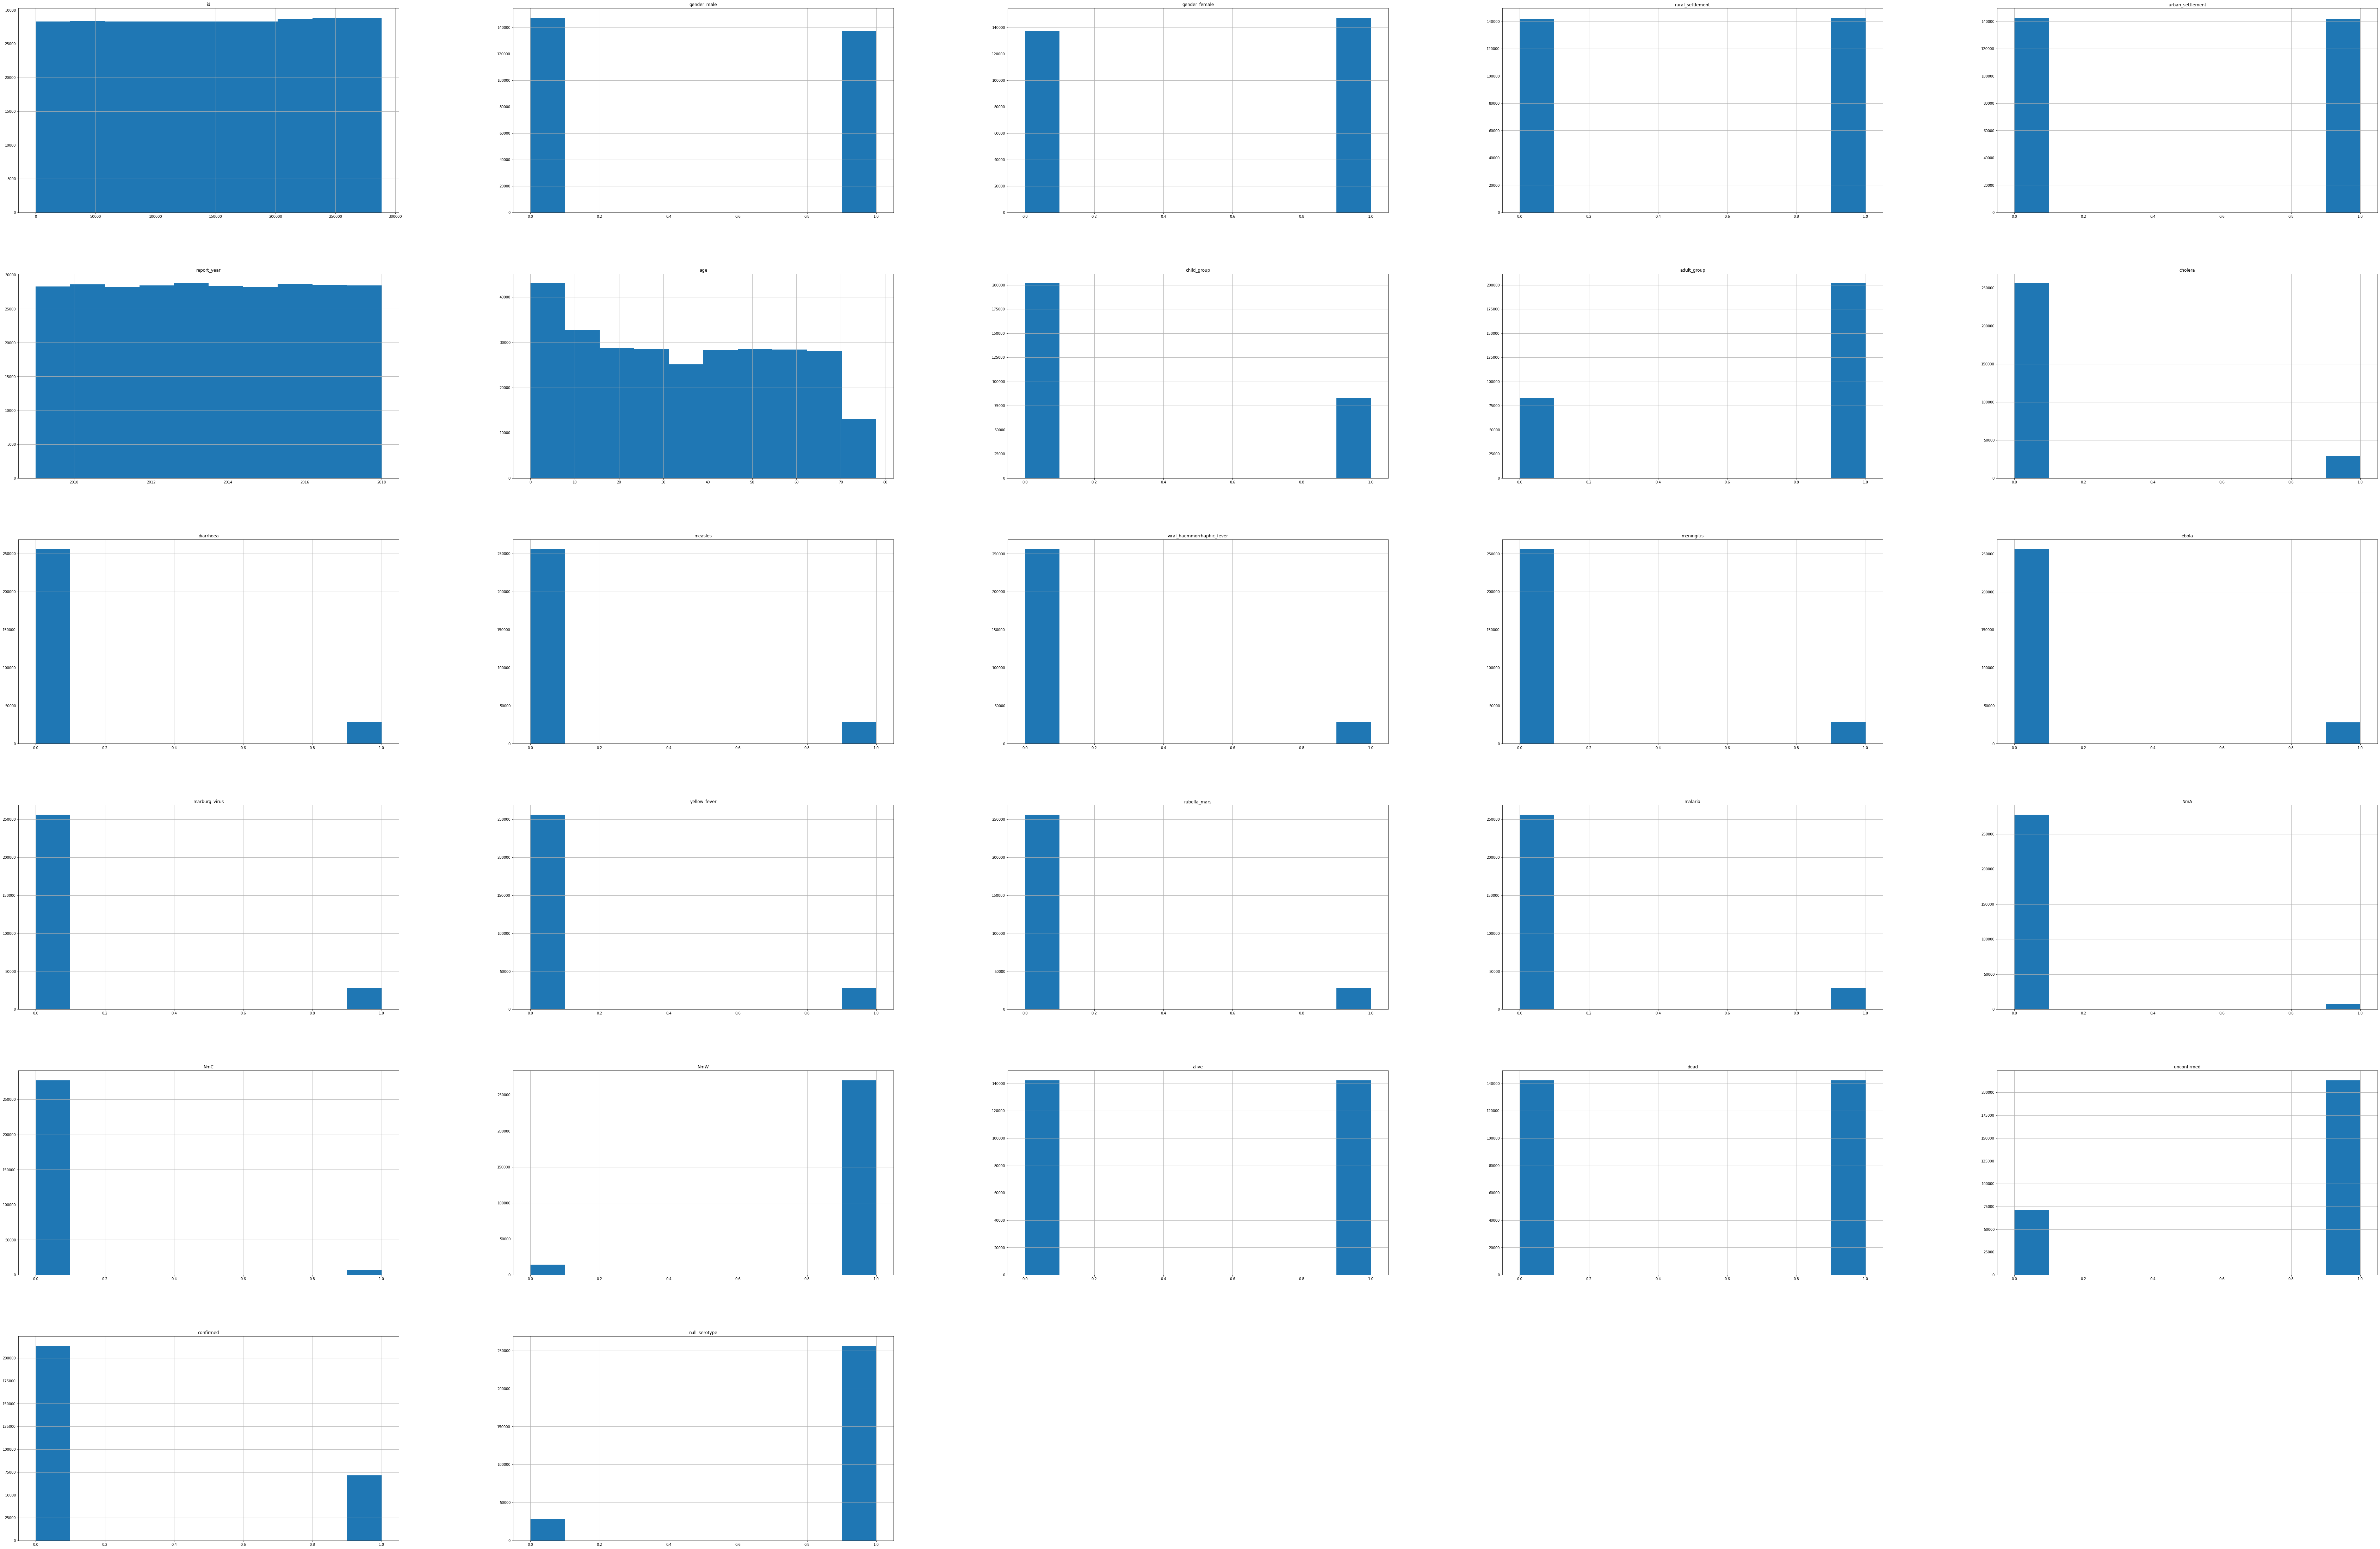

In [6]:
mng_dataframe.hist(figsize=(120,80))#shows visualization of each record
plt.show()

In [7]:
#check the no of male of female who have meningitis
no_female, no_male =mng_dataframe.groupby('gender').size()
mng_dataframe.groupby('gender').size()
print(no_female, "Number of female patients", no_male, "Number of male patients")

147272 Number of female patients 137212 Number of male patients


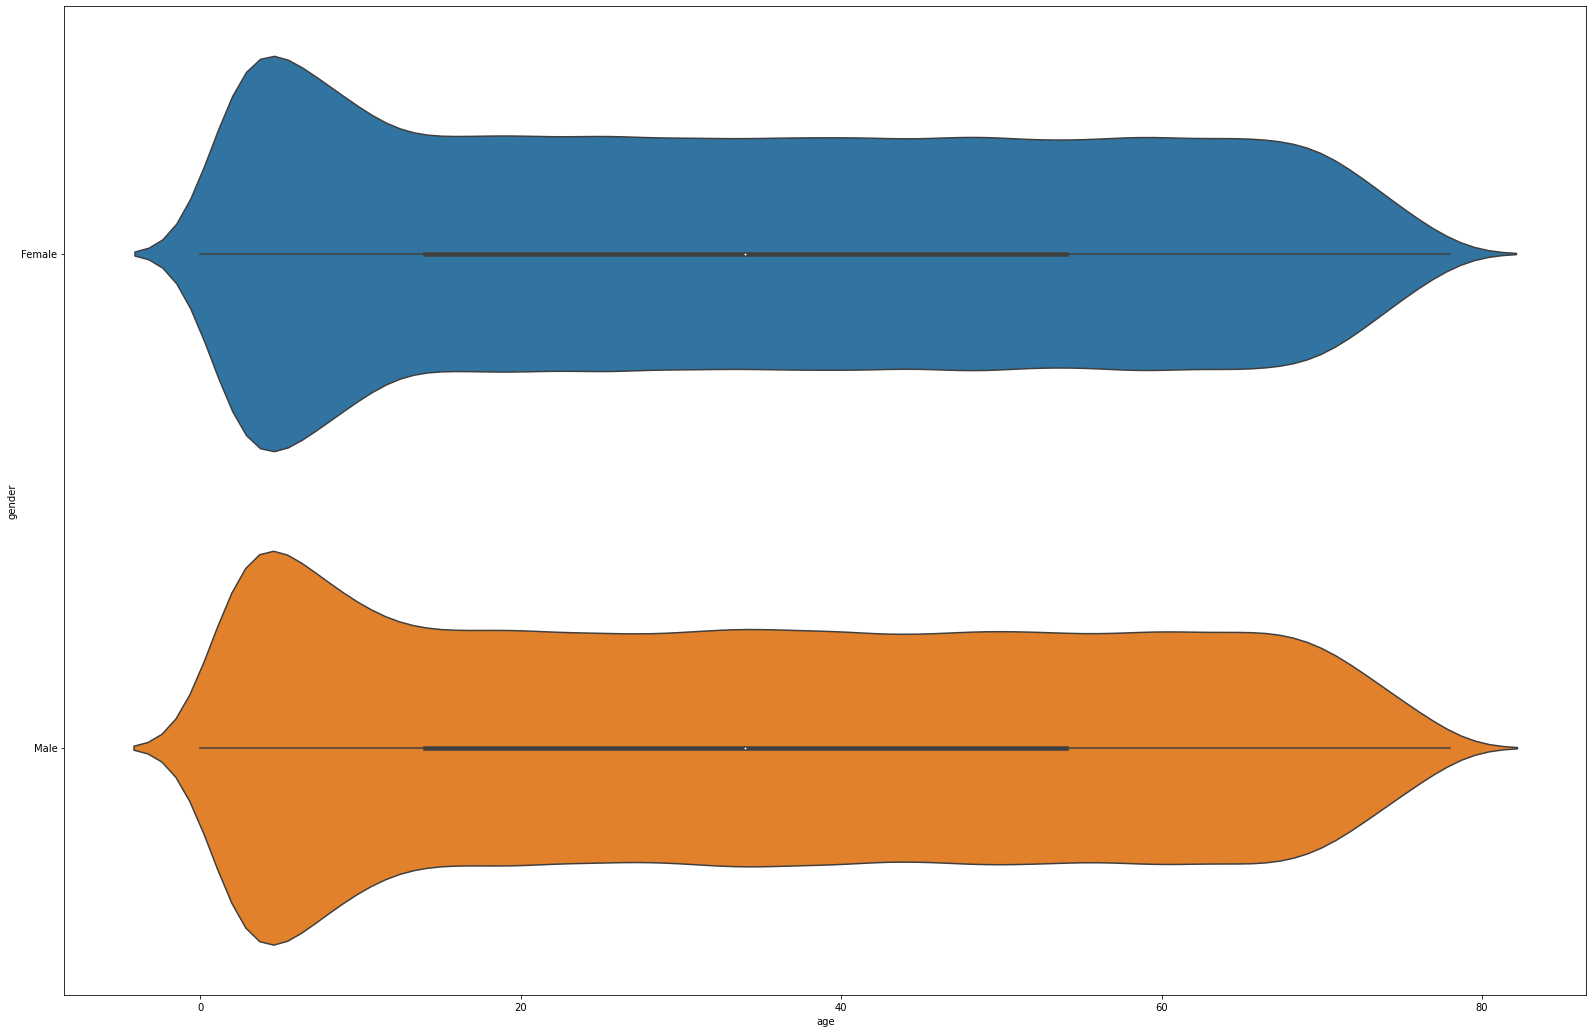

In [8]:
#visualization of the gender data
plt.figure(figsize=(60,40))#shows the size of the figure
plt.subplot(2,2,1)#add two rows, and two colums at index 1 
sns.violinplot(x='age', y='gender', data=mng_dataframe)#used for numeric data plots the probability density of the data
plt.show()

The oldest person to contract the disease is of age :  78


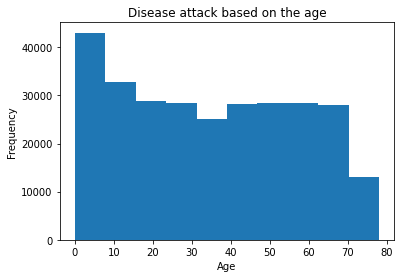

In [9]:
#visualization of the disease attack on age
#older people are not likely to get the disease 
#the young are more likely to get the disease
print("The oldest person to contract the disease is of age : ", mng_dataframe.age.max())#checks for the oldest person to contract the disease
mng_dataframe.age.plot.hist()
plt.xlabel('Age')
plt.title('Disease attack based on the age')
plt.show()

In [11]:
#import the model
from keras.models import Sequential #used for plain stack layers
from keras.layers import Dense 

In [12]:
#check the data types of the columns
#we have to work with integers
mng_dataframe.dtypes.sample(20)

dead                           int64
cholera                        int64
NmW                            int64
null_serotype                  int64
malaria                        int64
report_date                   object
id                             int64
surname                       object
child_group                    int64
gender                        object
viral_haemmorrhaphic_fever     int64
meningitis                     int64
rubella_mars                   int64
state                         object
firstname                     object
report_outcome                object
rural_settlement               int64
age_str                       object
marburg_virus                  int64
age                            int64
dtype: object

In [13]:
#select columns that are of data type integer
int_columns = mng_dataframe.select_dtypes(include = 'int64')
#displys the first five rows
print(int_columns.head())
print('\n\n')# skips two new lines
print(int_columns.info()) #gives the info on the integer rows and columns to be used on the model

   id  gender_male  gender_female  rural_settlement  urban_settlement  \
0   1            0              1                 1                 0   
1   2            1              0                 1                 0   
2   3            0              1                 0                 1   
3   4            0              1                 1                 0   
4   5            1              0                 0                 1   

   report_year  age  child_group  adult_group  cholera  ...  rubella_mars  \
0         2018   32            0            1        1  ...             0   
1         2017   32            0            1        0  ...             0   
2         2012   24            0            1        0  ...             0   
3         2010   63            0            1        0  ...             0   
4         2017    9            1            0        0  ...             1   

   malaria  NmA  NmC  NmW  alive  dead  unconfirmed  confirmed  null_serotype  
0        0    0   

In [14]:
#split the dataset into input(X) and output(Y)
#X = int_columns # our input will be the columns with datatype int64
#iloc takes integer based positions of rows and columns in a dataframe
#Y = int_columns.iloc[:,26] # the output will be from row 0 to column 25

#create the test and train data
feature_columns = ['age', 'cholera', 'null_serotype','yellow_fever', 'viral_haemmorrhaphic_fever','alive', 'NmW', 'marburg_virus','meningitis']
predicted_class = ['unconfirmed']

In [20]:
X = int_columns[feature_columns].values
Y = int_columns[predicted_class].values

In [21]:
#create the model
#model constructor
model = Sequential()#define the model
#use the add to add the layers incrementally in the model constructor
model.add(Dense(12, input_dim = 27, activation = 'relu'))
model.add(Dense(27, activation = 'relu'))#has 27 neurons
model.add(Dense(1, activation ='sigmoid'))
#to access the layers model.layers


In [ ]:
#compare how the model perfoms on the test data
#Evaluate accuracy
test_loss, test_acc = model.evaluate(X, Y, verbose=2)

print('\nTest accuracy:', test_acc)




In [ ]:
#calculate predictions
predictions = model.predict(X)
print(predictions)